In [1]:
import gdal
from Py6S import *
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import copy

## NDWI

$$NDWI = \frac{(GREEN - NIR)}{(GREEN + NIR)}$$

No Sentinel2:
```
GREEN: Band 3

NIR: Band 8
```

In [2]:
def nvwi(green,nir):
    return (green-nir)/(green+nir)

In [3]:
def openRaster(filename, acess=0):
    dataset = gdal.Open(filename, acess)
    if dataset is None:
        print("Erro ao abrir o arquivo")
    return dataset

In [4]:
blue = openRaster('img/T17RLL_20201015T160149_B02.jp2').ReadAsArray()
red = openRaster('img/T17RLL_20201015T160149_B04.jp2').ReadAsArray()
green = openRaster('img/T17RLL_20201015T160149_B03.jp2').ReadAsArray()
nir = openRaster('img/T17RLL_20201015T160149_B08.jp2').ReadAsArray()

## Informações da Imagem

Satelite: Sentinel-2 <br>
Data: 2020-10-15 <br>
Horário: 16:01:49

Para corrigir a reflectância dos pixels, usei [esse guia](http://blog.rtwilson.com/can-i-atmospherically-correct-my-images-with-py6s/)

In [5]:
sixS = SixS()
# Set the altitudes - Isso estou assumindo, pois não tenho as infos de localização da imagem
sixS.altitudes.set_target_sea_level()
sixS.altitudes.set_sensor_satellite_level()
# Set the ground reflectance to be a typical green veg spectrum
sixS.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
sixS.geometry = Geometry.User()
# Set the geometry for each SixS object
# With solar angles from location and time and
sixS.geometry.from_time_and_location(51.14510, -1.43861, "10/15/2020 16:01:49", 0, 0)

In [ ]:
sixS.run()

In [ ]:
im = np.zeros((10980,10980,3))
im[:,:,0] = np.uint8(blue)
im[:,:,1] = np.uint8(green)
im[:,:,2] = np.uint8(red)
im = np.uint8(im)
plt.imshow(im)
plt.axis('off')
plt.show()

In [7]:
nvwi_img = nvwi(green,nir)

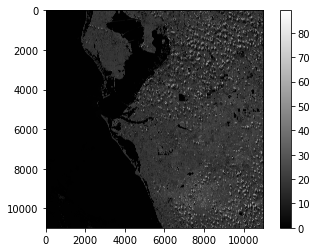

In [8]:
plt.imshow(nvwi_img, cmap='gray')
plt.colorbar()
plt.show()